In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Here's the nonlinear equation around which everything apparently revolves:

In [62]:
def yofx(X, tau, Lambda):
    return X * (1+ tau * (1 + Lambda * X)**2)

In [63]:
from sympy import symbols, solve, lambdify

# Define the variables
tau, X, Lambda = symbols('tau X Lambda')

# Define the equation
equation = 1 + tau + 4 * Lambda * tau * X + 3 * Lambda**2 * tau * X**2

# Solve the equation
solutions = solve(equation, X)

# Print the solutions
print("Solutions for X:")
X_neg, X_pos = solutions


Solutions for X:


In [64]:
equation

3*Lambda**2*X**2*tau + 4*Lambda*X*tau + tau + 1

In [65]:
X_pos

(-2*tau + sqrt(tau*(tau - 3)))/(3*Lambda*tau)

In [66]:
X_neg

(-2*tau - sqrt(tau*(tau - 3)))/(3*Lambda*tau)

Although it might just be the case that I didn't need to do that at all. 

In [67]:
X_pos_func = lambdify((tau, Lambda), X_pos, 'numpy')
X_neg_func = lambdify((tau, Lambda), X_neg, 'numpy')


In [68]:
x_pos_val = X_pos_func(3, -1)
x_neg_val = X_neg_func(3, -1)

Text(0.5, 0, '$Y$')

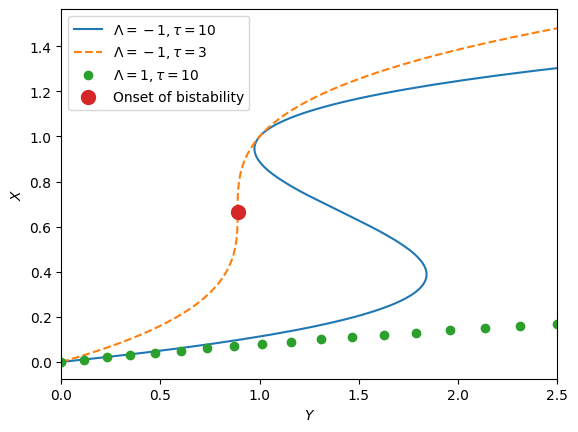

In [70]:
Lambda = -1
X = np.arange(0, 1.5, 0.01)
tau = 10
plt.plot(yofx(X, tau, Lambda), X, label = rf"$\Lambda = {Lambda}, \tau = {tau}$")
x_pos_val = X_pos_func(tau, Lambda)
X_neg_val = X_neg_func(tau, Lambda)
# plt.plot(yofx(x_pos_val, tau, Lambda), x_pos_val, 'o', fillstyle = None, markersize = 10, label = r"$X_+$")
# plt.plot(yofx(x_neg_val, tau, Lambda), x_neg_val, 'o', fillstyle = None, markersize = 10, label = r"$X_-$")

tau = 3
plt.plot(yofx(X, tau, Lambda), X, '--', label = rf"$\Lambda = {Lambda}, \tau = {tau}$")
Lambda = 1
tau = 10
plt.plot(yofx(X, tau, Lambda), X, 'o', label = rf"$\Lambda = {Lambda}, \tau = {tau}$")
x_pos_val = X_pos_func(3, -1)
plt.plot(yofx(x_pos_val, 3, -1), x_pos_val, 'o', fillstyle = None, markersize = 10, label = "Onset of bistability")

plt.legend()
plt.xlim(0, 2.5)
plt.ylabel(r"$X$")
plt.xlabel(r"$Y$")

In [28]:
yofx(X_pos_func(10, -1), 10, -1)

1.8412311248695208

In [25]:
X_neg_func(10,-1)

0.9455533421780252

Hmm, perhaps I can do a parameter sweep animation:

In [ ]:
Lambda = -1
X = np.arange(0, 1.5, 0.01)
tau = 3
plt.plot(yofx(X, tau, Lambda), X, '--', label = rf"$\Lambda = {Lambda}, \tau = {tau}$")


In [ ]:
Lambda = -1
X = np.arange(0, 1.5, 0.01)
fig, ax = plt.subplots()
line, = ax.plot(yofx(X, 3, Lambda), X, '--', c = 'g',label=rf"$\Lambda = {Lambda}, \tau = 3$")
plt.xlabel(r"$Y$")
plt.ylabel(r"$X$")
def update(tau):
    line.set_xdata(yofx(X, tau, Lambda))
    ax.set_title(rf"$\Lambda = {Lambda}, \tau = {tau:.2f}$")
    return line,

tau_values = np.arange(1, 11, 0.1)  # Adjust the step size as needed
animation = FuncAnimation(fig, update, frames=tau_values)


In [ ]:
plt.clf()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Lambda = -1
X = np.arange(0, 1.5, 0.01)
fig, ax = plt.subplots()
line, = ax.plot(yofx(X, 3, Lambda), X, '--', c='g', label=rf"$\Lambda = {Lambda}, \tau = 3$")
plt.xlabel(r"$Y$")
plt.ylabel(r"$X$")

def update(tau):
    line.set_xdata(yofx(X, tau, Lambda))
    ax.set_title(rf"$\Lambda = {Lambda}, \tau = {tau:.2f}$")
    return line,

tau_values = np.arange(1, 11, 0.1)  # Adjust the step size as needed

# Double the frames and create a reverse version
all_tau_values = np.concatenate((tau_values, tau_values[::-1]))

animation = FuncAnimation(fig, update, frames=all_tau_values)

# Save the animation as a GIF
animation.save('animation_forward_backward.gif', writer='pillow', fps=30)  # You can adjust fps as needed
plt.show()
